In [1]:
import visa 
import numpy as np
import serial
import time
import os
import math
import h5py
from utils import *
from pathlib import Path
path = os.getcwd()
path = Path(path)
print(Path(str(path.parent) + '\\Classes\\') )

import sys
sys.path.append(str(path.parent) + '\\Classes\\')
from SMA100B import *
from vna import *
from SIM928 import *

%load_ext autoreload
%autoreload 2

C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\visa.py:13: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  warnings.warn(


C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\Classes
C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\Classes


In [2]:
%matplotlib notebook

In [3]:
field_fox = vna('192.168.3.3')
field_fox.query('*IDN?')

'Keysight Technologies,N9916A,MY53104702,A.08.01\n'

In [4]:
pump = SMA100B('192.168.3.2')
pump.query('*IDN?')

'Rohde&Schwarz,SMA100B,1419.8888K02/105168,4.70.205.75  \n'

In [5]:
bias = SIM928('COM28', '4')
bias.query('*IDN?')

'Stanford_Research_Systems,SIM928,s/n030465,ver2.2\r\n'

In [7]:
#pump power
p0 = -18.5 #-45
p1 = -17.5 #-15 #best: 19
dp = 0.10 #2
P = np.arange(p0, p1, dp)
N_p = P.size
print(N_p)

#pump frequency
f0 = 17.75 #16.5
f1 = 18.25 #17.5
df = 20e-5
F = np.arange(f0, f1, df)
N_f = F.size
print(N_f)

#bias voltageat SIM
v0 = 0.300
v1 = 0.340
dv = 0.002
V = np.arange(v0, v1, dv)
N_v = V.size
print(N_v)

f, d = field_fox.SA_print_data()
n_points = f.size

filename = 'scan_completa_at_5_GHz.hdf5'
storage_hdf5(filename, F, 'pump_freq')
storage_hdf5(filename, P, 'pump_pow')
storage_hdf5(filename, V, 'bias_voltage')
#print(n_points)

maxima= np.empty((N_f, N_v, N_p))

10
2500
21


In [ ]:
start_time = time.time()
for i in range(0, N_v):
    bias.set_voltage(V[i])
    for j in range(0, N_p):
        pump.set_ampl(P[j])
        for k in range(0, N_f):
            pump.set_freq(F[k]*1e9)
            f, d = field_fox.SA_print_data()
            maxima[k][i][j] = max(d)
final_time = time.time() - start_time
storage_hdf5(filename, maxima, 'maxima')


In [108]:
final_time/3600

50.43070224887795

In [43]:
M = np.amax(maxima)
print(M)

-36.878376
81041


In [115]:
A, B, C = indexes_of_max(maxima)
print(A)
print(B)
print(C)

[6 6 6 6]
[2 2 2 2]
[1041 1042 1043 1044]


In [119]:
print(F[C[0]]/1e9, F[C[3]]/1e9)
print(V[A[0]])
print(P[B[0]])

17.958200000000005 17.958800000000004
0.312
-18.1


<IPython.core.display.Javascript object>


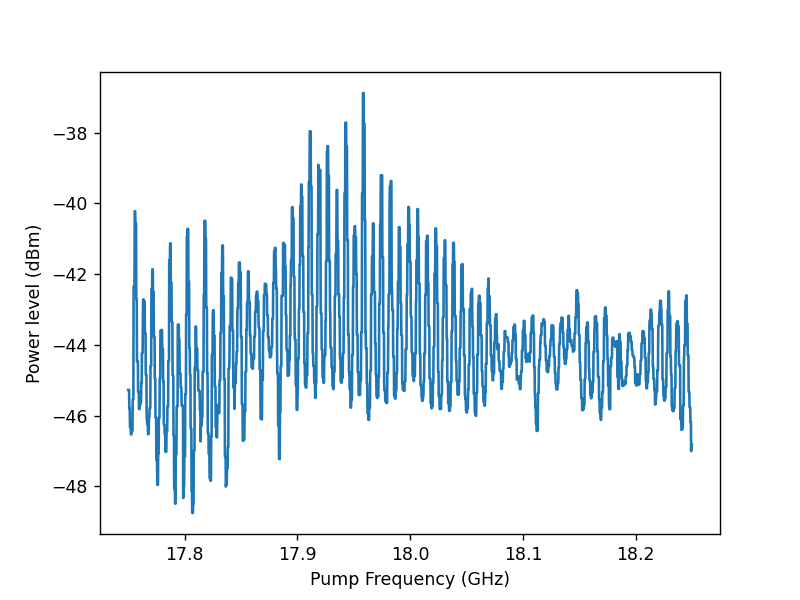

In [126]:
along_fr = maxima[6,2,:]
plt.plot(F, along_fr)
plt.xlabel('Pump Frequency (GHz)')
plt.ylabel('Power level (dBm)')
plt.savefig("Power vs pump freq at 0.312 V -18.1 dBm.png")

<IPython.core.display.Javascript object>


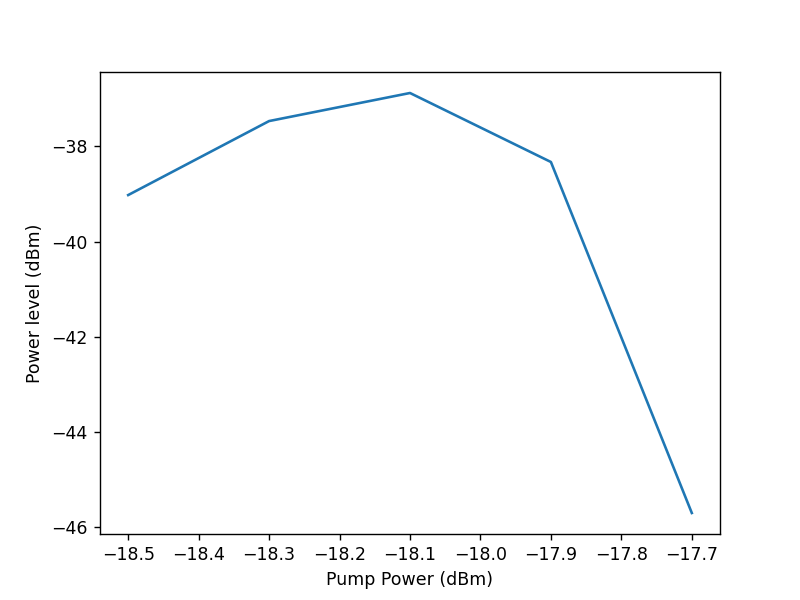

In [127]:
along_pow = maxima[6,:,1041]
plt.plot(P, along_pow)
plt.xlabel('Pump Power (dBm)')
plt.ylabel('Power level (dBm)')
plt.savefig("Power vs pump pow at 0.312 V 17.9582 GHz.png")

<IPython.core.display.Javascript object>


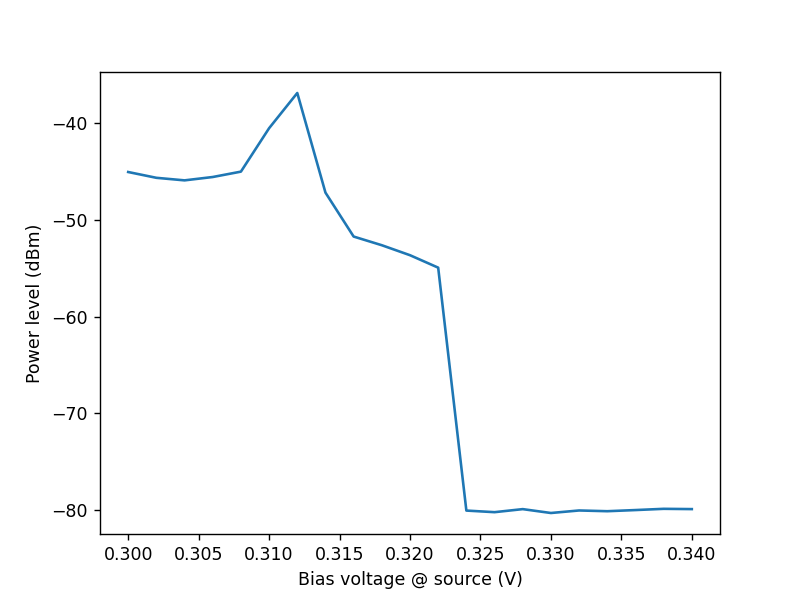

In [128]:
along_volt = maxima[:,2,1041]
plt.plot(V, along_volt)
plt.xlabel('Bias voltage @ source (V)')
plt.ylabel('Power level (dBm)')
plt.savefig("Power vs bias voltage at -18.1 dBm 17.9582 GHz.png")
#e che succede dopo 0.325 V?

In [123]:
(0.322-v0)/dv

11.000000000000009

In [120]:
#bias 0.395 V soglia

In [11]:
start_time = time.time()
bias.set_voltage(V[5])
final_time3 = time.time() - start_time
print(final_time3)

0.00500035285949707


In [12]:
start_time = time.time()
pump.set_ampl(P[3])
final_time2 = time.time() - start_time
print(final_time2)

0.002000093460083008


In [13]:
start_time = time.time()
pump.set_freq(F[5])
f, d = field_fox.SA_print_data()
maxima[1][2][5] = max(d)
final_time1 = time.time() - start_time
print(final_time1)

0.6850390434265137


In [16]:
tot_time = (((((final_time1*N_f)+final_time2)*N_p)+final_time3)*N_v)/(3600*24)
print(tot_time)

4.162569708633754
